# Assignment 2: Linear and Ridge Regression

In [1]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
if(sys.argv[2]!= None):
    alpha = 1
else:
    alpha = int(sys.argv[2])

In [3]:
def yPrime(y, D):
    d = len(D[0])
    zeros = np.array([np.zeros(d)]).T
    y_prime = np.concatenate((y, zeros))
    return y_prime

In [4]:
#aug_D creation
def augmentedD(D):
    n = len(D)
    a0 = np.array([np.ones(n)]).T
    aug_D = np.hstack((a0,D))
    return aug_D

In [5]:
#D' creation by concatenating A_sqrt under Aug_D
def Dprime(D, alpha):
    d = len(D[0])
    A_sqrt = math.sqrt(alpha) * np.identity(d)
    D_prime = np.concatenate((D, A_sqrt))
    return D_prime

## Projection
Returns the vector below as well as scalar multiple,
$$Proj_{\vec{a}}(\vec{b}) = \frac{\vec{b}^T\vec{a}}{\vec{a}^T\vec{a}}$$ 



In [6]:
def projection(a, b):
    num = np.matmul(b.T, a)
    den = np.matmul(a.T, a)
    proj = num[0][0] / den[0][0]
    return proj

## QR Factorization

$$D = QR =  \left(\begin{array}{c} \vec{u_0} & \vec{u_1} & ... &  \vec{u_d} \end{array}\right) 
\left(\begin{array}{cc} 
1 & P_{10} & ... & P_{d0}\\ 
0 & 1 & P_{21} & ...\\
0 & 0 & 1 & ...\\
\end{array}\right)$$

In [7]:
def qr(D):
    
    d = len(D[1])
    n = len(D)
    Q = np.array([np.zeros(n)]).T
    R = np.zeros(shape=(d,d))
    
    for i in range(d):
        
        #make diagonal 1's
        R[i][i] = 1
        
        if(i == 0):
            Q = np.array([D[:,i]]).T
        else:
            u = np.array([D[:,i]]).T
        for j in range(i):
            if (i > 0):
                x = np.array([D[:, i]]).T
                y = np.array([Q[:,j]]).T
                proj = projection(y, x)
                R[j][i] = proj
                u = u - proj * np.array([Q[:,j]]).T
        if(i != 0):
            Q = np.hstack((Q,u))
        
    return Q, R

In [8]:
def weights(Q, R, y):
    Delta = np.matmul(Q.T, Q)
    d = len(R[0])
    Delta_inverse = np.zeros((d,d))
    n = len(Q)
    w = np.zeros(d)
    
    for i in range(d):
        Delta_inverse[i][i] = 1 / Delta[i][i]

    B = np.matmul( np.matmul( Delta_inverse, Q.T ) ,  y )
    B = B[:,0]
    
    for i in range(d - 1, -1, -1):
        w[i] = B[i]
        for j in range(d - 1, i, -1):
            w[i] = w[i] - R[i][j] * w[j]
            
    return w   

### $$SSE = \sum_i(\hat{y_i} - y_i)^2 $$

In [9]:
def SSE(D, w, y):
    SSE = 0
    y_hat = np.matmul(D, w)
    y_hat = y_hat[:, 0]
    y = y[:, 0]
    for i in range(len(y)):
        SSE = SSE + (y_hat[i] - y[i])**2
    return SSE

### $$TSS = \sum_i (y_i - \mu_y)^2$$

In [10]:
def TSS(y):
    y = y[:, 0]
    mean = 0
    tss = 0
    
    for i in range(len(y)):
        mean = mean + y[i]
    
    mean = mean / len(y)
    
    for i in range(len(y)):
        tss = tss + (y[i] - mean)**2
    
    return tss

### $$R^2 = \frac{TSS - SSE}{TSS}$$

In [11]:
def rSq(D, w, y):
    sse = SSE(D,w, y)
    tss = TSS(y)
    rSq = (tss - sse)/tss
    return rSq

# Training Set

In [12]:
if(sys.argv[0]!= None):
    train = np.genfromtxt("Wanshouxigong.txt", delimiter=',')
else:
    train = np.genfromtxt(sys.argv[0], delimiter=',')

d = len(train[0])
D_train = train[:,np.arange(d-1)]
D_aug_train = augmentedD(D_train)
D_prime_train = Dprime(D_aug_train, alpha)
y_train = np.array([train[:,d-1]]).T
y_prime_train = yPrime(y_train, D_prime_train)

Q, R = qr(D_prime_train)
w = np.array([weights(Q, R, y_prime_train)]).T
print("w = \n", w)
l2_w = np.matmul(w.T, w)[0][0]
print("L_2 norm of w = ", l2_w)
train_sse = SSE(D_aug_train, w, y_train)
train_r2 = rSq(D_aug_train, w, y_train)
print("Training SSE = ", train_sse)
print("Training R^2 = ", train_r2)

w = 
 [[-16.42099957]
 [  0.55562408]
 [  0.08770576]
 [  0.08448248]
 [  0.01795393]
 [  0.0694564 ]
 [ -1.45122988]
 [  0.02004223]
 [  1.34604054]
 [ -0.62596433]
 [  0.96931524]
 [ -0.07322793]]
L_2 norm of w =  275.23298185101316
Training SSE =  43044046.59776054
Training R^2 =  0.8337862069671329


# Testing Set

In [13]:
if(sys.argv[1]!= None):
    test = np.genfromtxt("Wanliu.txt", delimiter=',')
else:
    test = np.genfromtxt(sys.argv[1], delimiter=',')
d = len(test[0])
D_test = test[:,np.arange(d-1)]
D_aug_test = augmentedD(D_test)

y_test = np.array([test[:,d-1]]).T


train_sse = SSE(D_aug_test, w, y_test)
train_r2 = rSq(D_aug_test, w, y_test)
print("Testing SSE = ", train_sse)
print("Testing R^2 = ", train_r2)

Testing SSE =  42279895.566565596
Testing R^2 =  0.8203032812408623


# Varying $\alpha$

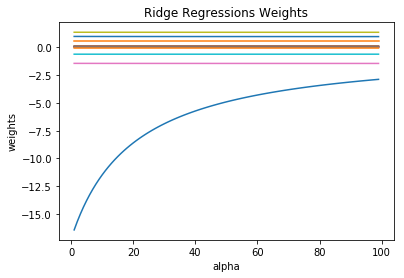

In [14]:
max_alpha = 100
alpha_range = []
weight = w
n = len(weight)
for a in range(max_alpha):
    if(a != 0):
        alpha_range.append(a)
        D_prime_train = Dprime(D_aug_train, a)
        y_train = np.array([train[:,d-1]]).T
        y_prime_train = yPrime(y_train, D_prime_train)
        Q, R = qr(D_prime_train)
        w_new = np.array([weights(Q, R, y_prime_train)]).T
        weight = np.hstack((weight, w_new))

weight = weight[:,np.arange(1, len(weight[0]))]
for i in range(n):
    
    plt.plot(alpha_range, weight[i,:])
    plt.xlabel("alpha")
    plt.ylabel("weights")
    plt.title("Ridge Regressions Weights")


plt.show()


# They all stay around the same for their weights excepts for the $w_0$ weight which drops quickly as alpha goes to infinity